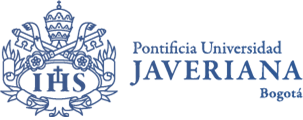
# Grupo No. 5: Online human Bot Interaction
# Aprendamos juntos a identificar Bots con la Api Botometer
Autores:

Eduardo Malagón

Juan Venegas

Giovanni Enrique López

Simón Moya Jiménez

#Preparativos
De manera local debe crearse un archivo apikey_twitter.json, el cual debe contener la siguiente estructura

{
  
	  "rapidapi_key": "xxxxxxxxxxxx",

	  "consumer_key": "xxxxxxxxxxx",

	  "consumer_secret": "xxxxxxxxxxxxxx",

	  "access_token": "xxxxxxxxxxxxxxxxx",

	  "access_token_secret": "xxxxxxxxxxxxxxxxx"
}

Recuerda que el parámetro rapidapi_key, lo obtienes a través del tu regisro en la API Botometer. La página Web es la siguiente: 
https://rapidapi.com/OSoMe/api/botometer-pro/

Los demás parámetros los obtienes de tu cuennta como desarrollador en twitter. De no contar con dicho registro, recomiendo ver el siguiente video:
https://www.youtube.com/watch?v=xn5RX2_4Gww

# Importación del Archivo apikey_twitter.json

In [ ]:
#Se procede con la importación del archivo apikey_twitter.json
from google.colab import files
uploaded = files.upload()

Saving apikey_twitter.json to apikey_twitter (1).json


#Instalación de libería botometer

In [ ]:
#Se procede con la instalación de la librería botometer
!pip install botometer

# Inicialización de librerías

In [3]:
#Se procede con la carga de las librerías necesarias para el funcionamiento de la aplicación
import botometer
import tweepy
from tweepy import OAuthHandler
import numpy as np
import json
from IPython.display import Image
from IPython.display import display

In [4]:
#Se procede con la lectura del archivo apikey_twitter.json, donde se encuentran las claves gestionadas 
#con Botometer y con las clave de desarrollador provistas por Twitter
with open("apikey_twitter.json") as file:
    apikey_twitter = json.load(file) 

In [5]:
#Se procede con la inicialización las variables que se requieren para autenticación de las librerías
rapidapi_key = apikey_twitter['rapidapi_key']
twitter_app_auth = {
    'consumer_key': apikey_twitter['consumer_key'],
    'consumer_secret': apikey_twitter['consumer_secret'],
    'access_token': apikey_twitter['access_token'],
    'access_token_secret': apikey_twitter['access_token_secret'],
  }

In [6]:
#Se procede con la autenticación de la librería Botometer
api_botometer = botometer.Botometer(wait_on_ratelimit=True,
                          rapidapi_key=rapidapi_key,
                          **twitter_app_auth)

In [7]:
#Se procede con la autenticación de la librería tweepy
consumer_key = apikey_twitter['consumer_key']
consumer_secret = apikey_twitter['consumer_secret']
access_token = apikey_twitter['access_token']
access_secret = apikey_twitter['access_token_secret']

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api_tweepy = tweepy.API(auth)
api_tweepy.get_user(screen_name="@DownloaderBot")

TweepError: ignored

In [ ]:
#Se procede con la creación de una función que permite obtener la imagen de perfil, usando la librería tweepy
def GetImage(screen_name):
    tweets = api_tweepy.get_user(screen_name=screen_name)
    return tweets.profile_image_url
#Para profundizar en la libreria tweepy, puedes dirigirte a la siguiente URL: https://docs.tweepy.org/en/stable/api.html

In [ ]:
# Se procede con la creación de una Función que realiza la Consulta de una cuenta
def SingleAccount(account_user):
    result = api_botometer.check_account(account_user)
    profile_image = GetImage(account_user)
    print(account_user)
    display(Image(url= profile_image, width=100, height=100))
    print (json.dumps(result, indent=4))

In [ ]:
SingleAccount("@DownloaderBot")

TweepError: ignored

In [ ]:
#Se procede con la Creación de una Función que realiza la Consulta de Múltiples Cuentas
def MultipleAccounts(accounts_group):
    data_content = []
    k = len(accounts_group)

    for screen_name, result in api_botometer.check_accounts_in(accounts_group):
        data_content.append(str(screen_name))
        data_content.append(GetImage(screen_name))
        data_content.append(result)

    NewA = np.array(data_content)
    NewA = NewA.reshape(k ,3)
    for i  in range (k):
        print(NewA[i][0])
        display(Image(url= NewA[i][1], width=100, height=100))
        print (json.dumps(NewA[i][2], indent=4))
        print("\n")

In [ ]:
accounts_group = ['@DownloaderBot', '@SimonMoyaJ']
MultipleAccounts(accounts_group)

# Meanings of the elements in the response:

user: Twitter user object (from the user) plus the language inferred from majority of tweets
raw scores: bot score in the [0,1] range, both using English (all features) and Universal (language-independent) features; in each case we have the overall score and the sub-scores for each bot class (see below for subclass names and definitions)
display scores: same as raw scores, but in the [0,5] range
cap: conditional probability that accounts with a score equal to or greater than this are automated; based on inferred language
Meanings of the bot type scores:

fake_follower: bots purchased to increase follower counts
self_declared: bots from botwiki.org
astroturf: manually labeled political bots and accounts involved in follow trains that systematically delete content
spammer: accounts labeled as spambots from several datasets
financial : bots that post using cashtags
other: miscellaneous other bots obtained from manual annotation, user feedback, etc.

Para más detalles:
https://rapidapi.com/OSoMe/api/botometer-pro/details


In [ ]:
#Ahora Tú - Realiza el análisis de tu usuario de Tweeter y el de tu Empresa a través del código planteado 